# MTA Traffic Forecasting
Khyatee Desai & Justin Morgan
# Part 4: Modeling Process
This notebook includes feature engineering and modeling

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

### Import Cleaned Data

In [2]:
df = pd.read_pickle("./pickled/cleaned_data")
df

STATION,1 AV,103 ST,103 ST-CORONA,104 ST,110 ST,111 ST,116 ST,116 ST-COLUMBIA,121 ST,125 ST,...,WHITLOCK AV,WILSON AV,WINTHROP ST,WOODHAVEN BLVD,WOODLAWN,WORLD TRADE CTR,WTC-CORTLANDT,YORK ST,ZEREGA AV,TOTAL
DATE,,,,,,,,,,,,,,,,,,,,,
2021-01-02,3559.0,4694.0,6158.0,979.0,2115.0,4661.0,5677.0,693.0,550.0,13679.0,...,466.0,973.0,1074.0,5682.0,1816.0,161.0,1594.0,1.0,472.0,864360.0
2021-01-03,2415.0,3278.0,4571.0,647.0,1522.0,3387.0,3994.0,455.0,401.0,9582.0,...,337.0,724.0,842.0,3784.0,1130.0,59.0,648.0,2.0,354.0,578814.5
2021-01-04,5193.0,7801.0,9253.0,1800.0,3378.0,7114.0,8669.0,1921.0,903.0,21790.0,...,788.0,1429.0,2552.0,6347.5,2780.0,2309.0,1546.0,2129.0,918.0,1426146.0
2021-01-05,5333.0,8251.0,9794.0,1795.0,3630.0,7692.0,9119.0,1936.0,946.0,22314.0,...,819.0,1513.0,2677.0,8911.0,2926.0,2395.0,1492.0,2153.0,956.0,1472308.5
2021-01-06,5468.0,8467.0,9972.0,1832.0,3850.0,7622.0,9131.0,2021.0,938.0,21924.0,...,841.0,1528.0,2609.0,9127.0,2840.0,2403.0,1560.0,2202.0,932.0,1482079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-08,5833.0,9097.0,9427.0,1952.0,3802.0,7169.0,10187.0,2131.0,1058.0,23662.0,...,818.0,1463.0,2887.0,8693.0,2841.0,2381.0,1641.0,2176.0,918.0,1525163.0
2021-03-09,6154.0,9570.0,9947.0,1943.0,4267.0,7642.0,10444.0,2172.0,998.0,25143.0,...,884.0,1650.0,2994.0,9338.0,3077.0,2565.0,1759.0,2418.0,979.0,1616116.0
2021-03-10,6021.0,9773.0,9926.0,1952.0,4190.0,7648.0,10768.0,2296.0,1111.0,24893.0,...,907.0,1570.0,2930.0,9329.0,3083.0,2493.0,1628.0,2374.0,976.0,1622137.0


### Define Dickey-Fuller Test Function

In [3]:
def dickey_fuller(series):
    dftest = adfuller(series)

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dftest)
    print ('\nResults of Dickey-Fuller test: \n')
    print(dfoutput)

# Remove Trends
Compare and contrast the different methods for removing trends and seasonality in time series data including differencing, rolling means, and log transformations to reduce non-stationarity



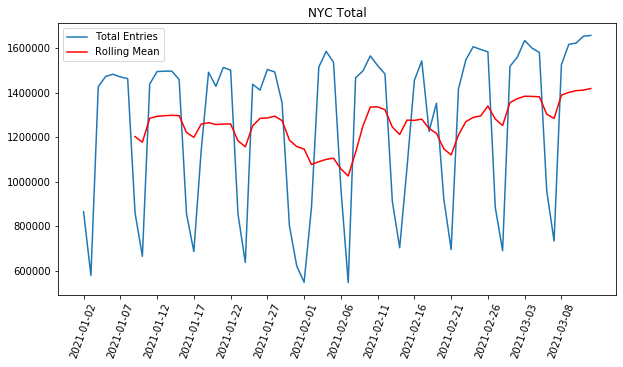

In [4]:
roll_mean = df["TOTAL"].rolling(window=8, center=False).mean()

plt.figure(figsize=(10,5));
ax = sns.lineplot( data=df["TOTAL"], label="Total Entries");
plt.plot(roll_mean, color='red', label='Rolling Mean')
ax.set(xticks=[x for x in df.index.values if df.index.get_loc(x)%5==0]);
plt.xticks(rotation=70);
plt.legend(loc='best');
plt.title('NYC Total');

Current data contains both Trends and Seasonality
<br>
**Trend:** Varying mean over time
<br>
**Seasonality:** Certain variations at specific time-frames
## Log Transformation
One way to enforce stationarity can be a simple log transformation to make the time series more "uniform" over time. For example, in the plot below, we can clearly see that there is a significant positive trend, which might not be linear, or when there is a certain level of heteroscedasticity.

The advantage of taking a log transformation is that higher values are penalized more than lower values. Alternatives for the log transformation are the square root, cube root transformations, etc.

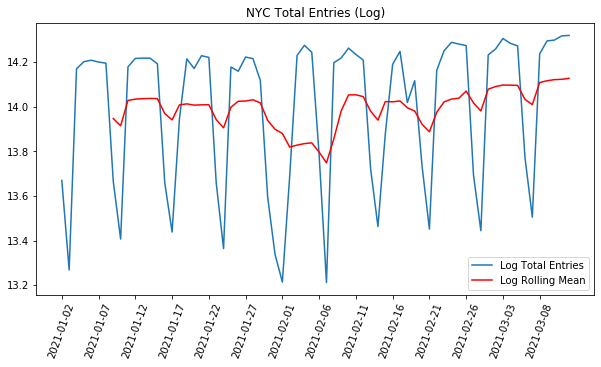

In [5]:
log_roll_mean = np.log(df["TOTAL"]).rolling(window=8, center=False).mean()
log_data = np.log(df["TOTAL"])

plt.figure(figsize=(10,5));
ax = sns.lineplot( data= log_data, label="Log Total Entries");
plt.plot(log_roll_mean, color='red', label='Log Rolling Mean')
ax.set(xticks=[x for x in df.index.values if df.index.get_loc(x)%5==0]);
plt.xticks(rotation=70);
plt.legend(loc='best');
plt.title('NYC Total Entries (Log)');

In [6]:
# Drop the missing values from time series calculated above
log_data.dropna(inplace=True)

### Check Stationarity with Dickey Fuller Test

In [7]:
dickey_fuller(log_data)


(-1.3799135317123836, 0.5918670473893259, 6, 63, {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}, -8.374281426629878)

Results of Dickey-Fuller test: 

Test Statistic                 -1.379914
p-value                         0.591867
#Lags Used                      6.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


## Subtract Rolling Mean

In [8]:
# Subtract the moving average from the original data
roll_mean = df["TOTAL"].rolling(window=8, center=False).mean()
data_minus_roll_mean = df["TOTAL"] - roll_mean
data_minus_roll_mean.head(15)

DATE
2021-01-02              NaN
2021-01-03              NaN
2021-01-04              NaN
2021-01-05              NaN
2021-01-06              NaN
2021-01-07              NaN
2021-01-08              NaN
2021-01-09   -341799.625000
2021-01-10   -512316.312500
2021-01-11    153698.062500
2021-01-12    201068.895833
2021-01-13    199838.937500
2021-01-14    198320.104167
2021-01-15    162006.312500
2021-01-16   -364358.875000
Name: TOTAL, dtype: float64

In [9]:
# Drop the missing values from time series calculated above
data_minus_roll_mean.dropna(inplace=True)

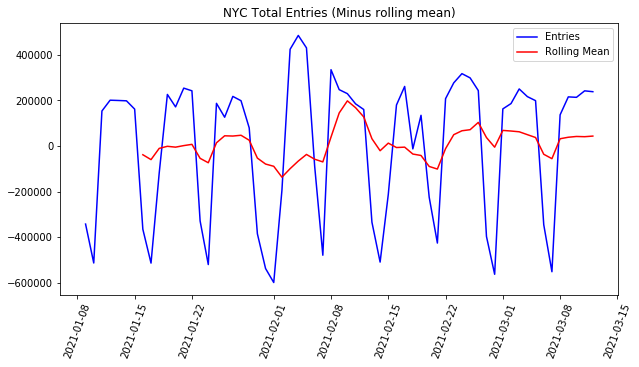

In [10]:
roll_mean = data_minus_roll_mean.rolling(window=8, center=False).mean()

plt.figure(figsize=(10,5));
plt.plot(data_minus_roll_mean, color='blue',label='Entries')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('NYC Total Entries (Minus rolling mean)')
ax.set(xticks=[x for x in df.index.values if df.index.get_loc(x)%7==0]);
plt.xticks(rotation=70);


### Check Stationarity with Dickey Fuller Test

In [11]:
dickey_fuller(data_minus_roll_mean)


(-4.179220465388476, 0.0007143465656967201, 11, 51, {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}, 1399.655899753319)

Results of Dickey-Fuller test: 

Test Statistic                 -4.179220
p-value                         0.000714
#Lags Used                     11.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


## Differencing
One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of an observation at a particular time instant with that at the previous instant (i.e. a so-called 1-period "lag").

This mostly works pretty well in improving stationarity. First-order differencing can be done in Pandas using the .diff() method with periods=1 (denoting a 1-period lag). 

In [12]:
data_diff = df["TOTAL"].diff(periods=1)
data_diff.head(10)

DATE
2021-01-02         NaN
2021-01-03   -285545.5
2021-01-04    847331.5
2021-01-05     46162.5
2021-01-06      9770.5
2021-01-07    -12185.5
2021-01-08     -7306.0
2021-01-09   -602331.5
2021-01-10   -195462.5
2021-01-11    773442.0
Name: TOTAL, dtype: float64

In [13]:
# Drop the missing values from time series calculated above
data_diff.dropna(inplace=True)

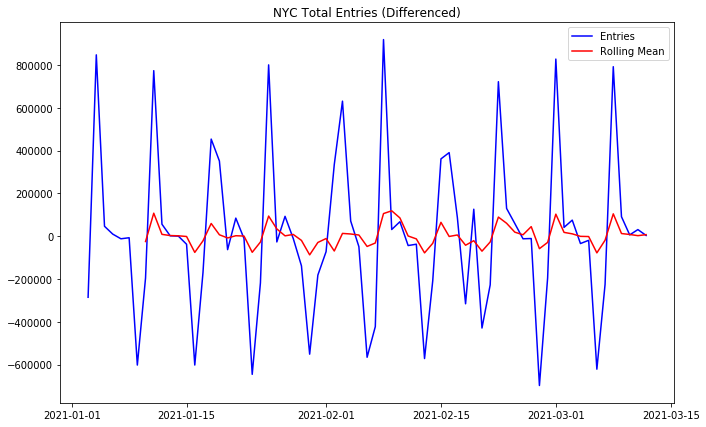

In [14]:
roll_mean = data_diff.rolling(window=8, center=False).mean()

fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Entries')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('NYC Total Entries (Differenced)')
plt.show(block=False)

### Confirm Stationarity with Dickey Fuller Test

In [15]:
dickey_fuller(data_diff)


(-12.046616332305604, 2.65584195564352e-22, 5, 63, {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}, 1570.5236171563283)

Results of Dickey-Fuller test: 

Test Statistic                -1.204662e+01
p-value                        2.655842e-22
#Lags Used                     5.000000e+00
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64


## Differencing & Log Transformation

In [16]:
log_data = np.log(df["TOTAL"])
log_diff_data = log_data.diff(periods=1)

In [17]:
# Drop the missing values from time series calculated above
log_diff_data.dropna(inplace=True)

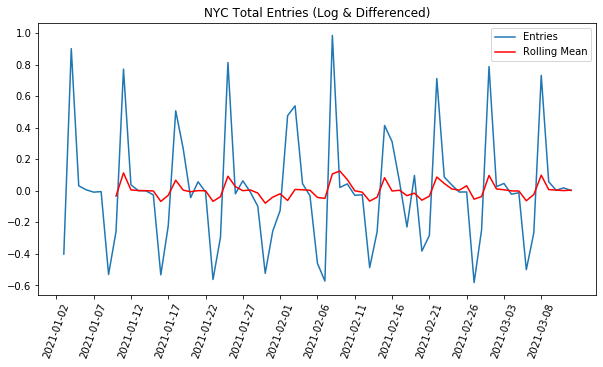

In [18]:
roll_mean = log_diff_data.rolling(window=8, center=False).mean()

plt.figure(figsize=(10,5));
ax = sns.lineplot( data= log_diff_data, label="Entries");
plt.plot(roll_mean, color='red', label='Rolling Mean')
ax.set(xticks=[x for x in df.index.values if df.index.get_loc(x)%5==0]);
plt.xticks(rotation=70);
plt.legend(loc='best');
plt.title('NYC Total Entries (Log & Differenced)');

### Confirm Stationarity with Dickey Fuller Test

In [19]:
dickey_fuller(log_diff_data)


(-12.434234398205962, 3.879177690032514e-23, 5, 63, {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}, -6.930554341526943)

Results of Dickey-Fuller test: 

Test Statistic                -1.243423e+01
p-value                        3.879178e-23
#Lags Used                     5.000000e+00
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64


## Time Series Decomposition
Time series decomposition is a mathematical procedure that transforms a time series into multiple different time series. The original time series is often split into three component series:

**Seasonal:** Patterns that repeat within a fixed period. For example, a website might receive more visits during weekends; this would produce data with a seasonality of 7 days.
<br>
**Trend:** The underlying trend of the metrics. A website increasing in popularity should show a general trend that goes up.
<br>
**Random:** Also called "noise", "irregular", or "remainder", this is the residual of the original time series after the seasonal and trend series are removed.

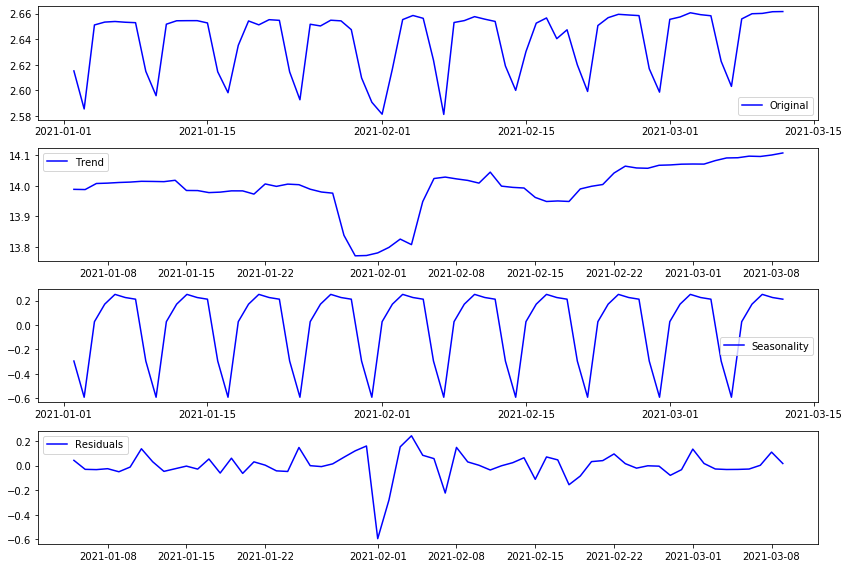

In [20]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(df['TOTAL']))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(np.log(df['TOTAL'])), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

### Check Stationarity of Residuals with Dickey Fuller

In [21]:
# Drop missing values from residuals 
df_log_decompose = residual
df_log_decompose.dropna(inplace=True)
dickey_fuller(df_log_decompose)


(-4.185961050227, 0.0006958973266518092, 8, 55, {'1%': -3.5552728880540942, '5%': -2.9157312396694217, '10%': -2.5956695041322315}, -85.85938187758936)

Results of Dickey-Fuller test: 

Test Statistic                 -4.185961
p-value                         0.000696
#Lags Used                      8.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


# Autocorrelation
Processes with greater autocorrelation are more predictable than those without any form of autocorrelation. This process compares each value in the time series with it's previous value. This is called "lag 1 autocorrelation".

In [22]:
# shift the series forward by 1 lag
total = df['TOTAL']
total_shift_1 = total.shift(periods=1)
lag_1 = pd.concat([total_shift_1, total], axis=1)
lag_1.corr()

,TOTAL,TOTAL
TOTAL,1.000000,0.443289
TOTAL,0.443289,1.000000


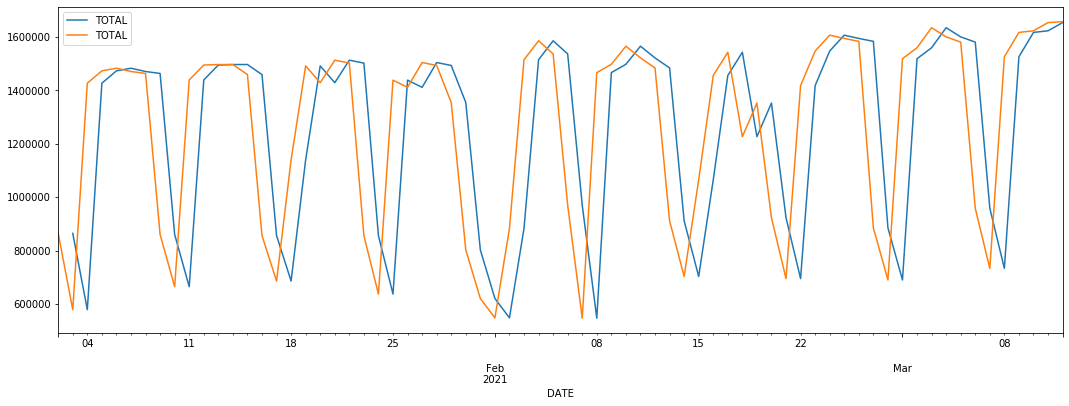

In [23]:
lag_1.plot(figsize=(18,6));

### Lag 7

In [24]:
total_shift_7 = total.shift(periods=7)
lag_7 = pd.concat([total_shift_7, total], axis=1)
lag_7.corr()

,TOTAL,TOTAL
TOTAL,1.000000,0.796507
TOTAL,0.796507,1.000000


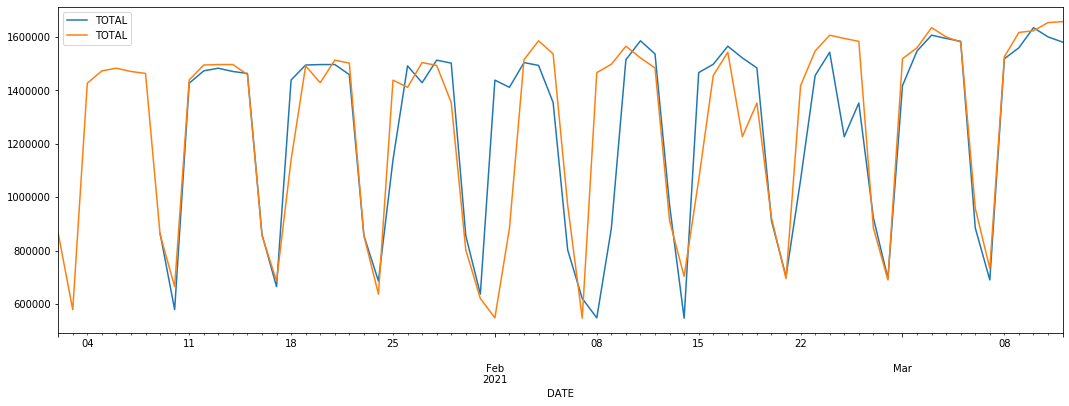

In [25]:
lag_7.plot(figsize=(18,6));

## Autocorrelation Function
The autocorrelation function (often abbreviated to ACF) provides a summary of the autocorrelations for each lag. 
- It's a function that represents autocorrelation of a time series as a function of the time lag.
- The dotted lines in the plot tell you about the statistical significance of the correlation.

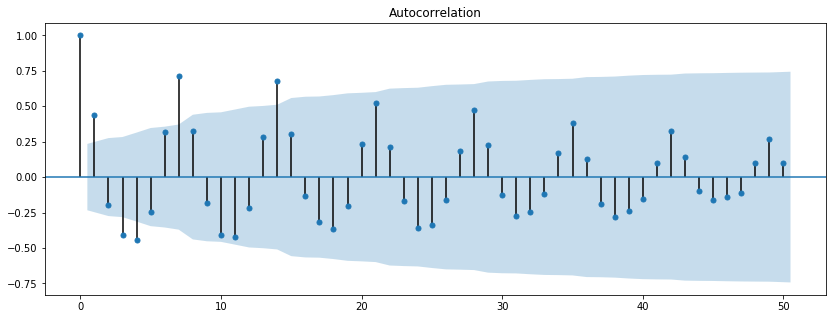

In [26]:
# Try the Statsmodels ACF just for shits
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_acf(df['TOTAL'], lags=50);

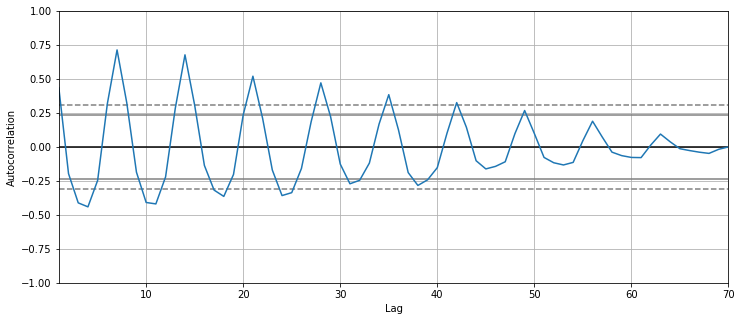

In [54]:
# Try the Pandas AC Function
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df['TOTAL']);

Plot above shows consistent spikes at each multiple of 7. Correlation is statistically significant for first ~30 days.
### Autocorrelation with Differencing

In [55]:
total_diff = df['TOTAL'].diff(periods=1)
total_diff.dropna(inplace=True)

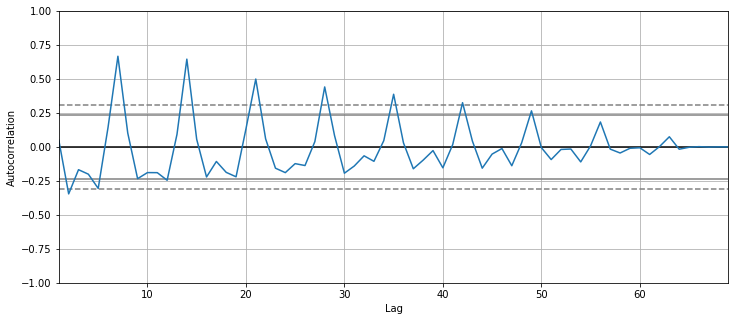

In [56]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(total_diff);

The differenced ACF seems a little more stable, revolving around 0. Additionally, the autocorrelation for multiples of 7 seems consistently statistically significant, while it decays for longer time lags.
# Partial Autocorrelation Function
Partial Autocorrelation Function (or PACF) gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags (unlike the autocorrelation function, which does not control for other lags). 
- PACF can be thought of as a summary of the relationship between a time series element with observations at a lag, with the relationships of intervening observations removed.
- PACF can be interpreted as a regression of the series against its past lags. 
- It helps to come up with a possible order for the auto regressive term. 
The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

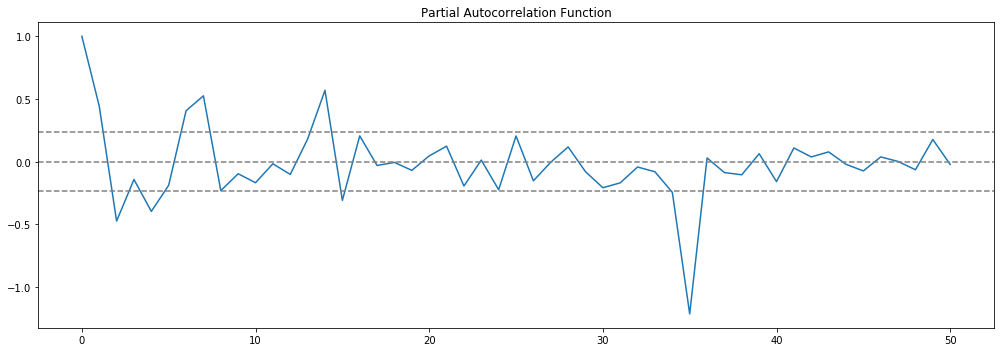

In [58]:
from statsmodels.tsa.stattools import acf, pacf

lag_pacf = pacf(df['TOTAL'], nlags=50, method='ols')
plt.plot(lag_pacf);
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(total_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(total_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# ARMA Model
Regression on past values takes place (AR part) and also that the error term is modeled as a linear combination of error terms of the recent past (MA part). ARMA is generally denoted as ARMA(p, q).
- p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
- q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

## Autogregressive (AR) Model 
An autoregressive (AR) model is when a value from a time series is regressed on previous values from the same time series.
- If the slope is 0, the time series is a white noise model with mean $\mu$
- If the slope is not 0, the time series is autocorrelated
- Bigger slope means bigger autocorrelation
- When there is a negative slope, the time series follows an oscillatory process

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


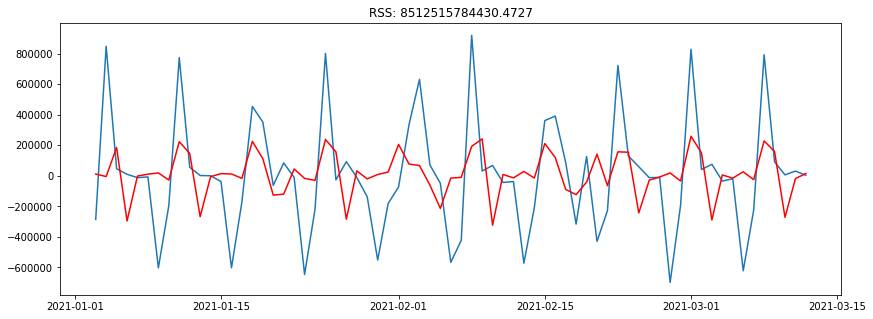

In [81]:
# Import ARIMA
from statsmodels.tsa.arima_model import ARIMA

# define series
data = df["TOTAL"].diff(periods=1).dropna()

model = ARIMA(data, order=(2, 0, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(data);
plt.plot(results_AR.fittedvalues, color='red');
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data)**2));

## Moving Average (MA) Model
The Moving Average model can be described as the weighted sum of today's and yesterday's noise.
- If the slope is 0, the time series is a white noise model with mean $\mu$
- If the slope is not 0, the time series is autocorrelated and depends on the previous white noise process
- Bigger slope means bigger autocorrelation
- When there is a negative slope, the time series follow an oscillatory process

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


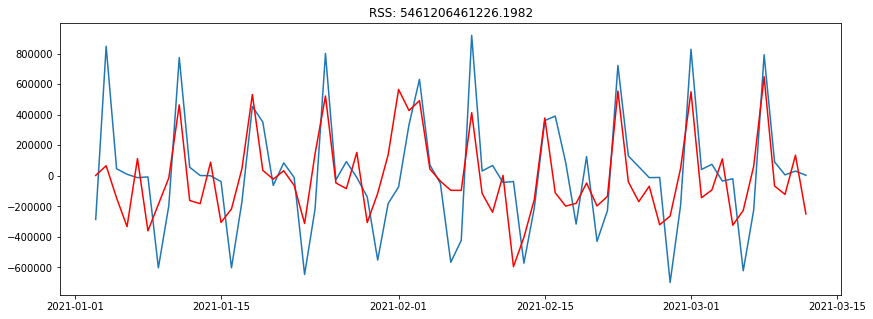

In [80]:
model = ARIMA(data, order=(0, 0, 6))  
results_MA = model.fit(disp=-1)  
plt.plot(data)
plt.plot(results_MA.fittedvalues, color='red');
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-data)**2));

# Combined Model
Combines AR and MA

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


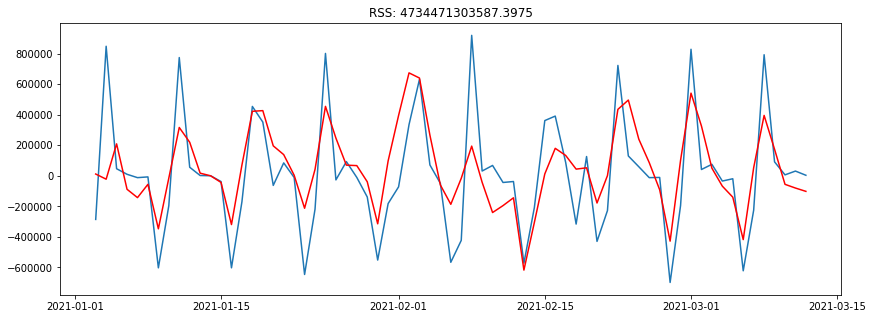

In [79]:
model = ARIMA(data, order=(2, 0, 6))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(data)
plt.plot(results_ARIMA.fittedvalues, color='red');
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-data)**2));

In [82]:
results_ARIMA.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  TOTAL   No. Observations:                   69
Model:                     ARMA(2, 6)   Log Likelihood                -956.993
Method:                       css-mle   S.D. of innovations         237645.360
Date:                Wed, 24 Mar 2021   AIC                           1933.986
Time:                        17:23:43   BIC                           1956.327
Sample:                    01-03-2021   HQIC                          1942.850
                         - 03-12-2021                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.148e+04        nan        nan        nan         nan         nan
ar.L1.TOTAL     1.1522      0.080     14.440      0.000       0.996       1.309
ar.L2.TOTAL    -0.8744      0.071    -12.309      0.000      -1.014      -0.735
ma.L1.TOTAL    -1.7231      0.116    -14.874      0.000      -1.950      -1.496
ma.L2.TOTAL     0.9882      0.230      4.301      0.000       0.538       1.439
ma.L3.TOTAL    -0.0734      0.244     -0.300      0.764      -0.553       0.406
ma.L4.TOTAL    -0.1225      0.369     -0.332      0.740      -0.845       0.600
ma.L5.TOTAL    -0.4867      0.407     -1.195      0.232      -1.285       0.312
ma.L6.TOTAL     0.5375      0.182      2.957      0.003       0.181       0.894
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6589           -0.8423j            1.0694           -0.1444
AR.2            0.6589           +0.8423j            1.0694            0.1444
MA.1           -1.0148           -0.8515j            1.3247           -0.3889
MA.2           -1.0148           +0.8515j            1.3247            0.3889
MA.3            0.4892           -0.9060j            1.0297           -0.1712
MA.4            0.4892           +0.9060j            1.0297            0.1712
MA.5            0.9784           -0.2065j            1.0000           -0.0331
MA.6            0.9784           +0.2065j            1.0000            0.0331
-----------------------------------------------------------------------------
"""